<table style="width: 100%;" id="nb-header">
    <tr style="background-color: transparent;"><td>
        <img src="https://data-88e.github.io/assets/images/blue_text.png" width="250px" style="margin-left: 0;" />
    </td><td>
        <p style="text-align: right; font-size: 10pt;"><strong>Economic Models</strong>, EdX<br>
            Dr. Eric Van Dusen <br>
            Peter F. Grinde-Hollevik <br>
        Akhil Venkatesh <br>
</table>

# Lecture Notebook 2.3b: A Really Hot Tuesday

In [1]:
import pandas as pd
import numpy as np

In [2]:
cds = pd.read_csv('CAISO_2017to2018_stack.csv', index_col=0)
cds.head()

Source   MWh
2017-08-29 00:00:00   GEOTHERMAL  1181
2017-08-29 00:00:00      BIOMASS   340
2017-08-29 00:00:00       BIOGAS   156
2017-08-29 00:00:00  SMALL HYDRO   324
2017-08-29 00:00:00   WIND TOTAL  1551

In [3]:
cds = cds.rename({'Unnamed: 0':'dt'}, axis=1)
cds

Source   MWh
2017-08-29 00:00:00     GEOTHERMAL  1181
2017-08-29 00:00:00        BIOMASS   340
2017-08-29 00:00:00         BIOGAS   156
2017-08-29 00:00:00    SMALL HYDRO   324
2017-08-29 00:00:00     WIND TOTAL  1551
...                            ...   ...
2018-08-28 23:00:00         BIOGAS   235
2018-08-28 23:00:00    SMALL HYDRO   262
2018-08-28 23:00:00     WIND TOTAL  2921
2018-08-28 23:00:00       SOLAR PV     0
2018-08-28 23:00:00  SOLAR THERMAL     0

[61320 rows x 2 columns]

In [4]:
cds_date = pd.to_datetime(cds.index)
cds_date

DatetimeIndex(['2017-08-29 00:00:00', '2017-08-29 00:00:00',
               '2017-08-29 00:00:00', '2017-08-29 00:00:00',
               '2017-08-29 00:00:00', '2017-08-29 00:00:00',
               '2017-08-29 00:00:00', '2017-08-29 01:00:00',
               '2017-08-29 01:00:00', '2017-08-29 01:00:00',
               ...
               '2018-08-28 22:00:00', '2018-08-28 22:00:00',
               '2018-08-28 22:00:00', '2018-08-28 23:00:00',
               '2018-08-28 23:00:00', '2018-08-28 23:00:00',
               '2018-08-28 23:00:00', '2018-08-28 23:00:00',
               '2018-08-28 23:00:00', '2018-08-28 23:00:00'],
              dtype='datetime64[ns]', length=61320, freq=None)

In [5]:
cds['hour'] = cds_date.hour
cds

Source   MWh  hour
2017-08-29 00:00:00     GEOTHERMAL  1181     0
2017-08-29 00:00:00        BIOMASS   340     0
2017-08-29 00:00:00         BIOGAS   156     0
2017-08-29 00:00:00    SMALL HYDRO   324     0
2017-08-29 00:00:00     WIND TOTAL  1551     0
...                            ...   ...   ...
2018-08-28 23:00:00         BIOGAS   235    23
2018-08-28 23:00:00    SMALL HYDRO   262    23
2018-08-28 23:00:00     WIND TOTAL  2921    23
2018-08-28 23:00:00       SOLAR PV     0    23
2018-08-28 23:00:00  SOLAR THERMAL     0    23

[61320 rows x 3 columns]

In [6]:
cds_piv = cds.pivot_table(
    values = 'MWh',
    index = 'hour',
    columns = 'Source')
cds_piv

Source      BIOGAS     BIOMASS  GEOTHERMAL  SMALL HYDRO     SOLAR PV  \
hour                                                                   
0       225.591781  318.301370  958.720548   330.824658     0.679452   
1       225.964384  318.369863  959.235616   322.421918     0.643836   
2       225.953425  319.846575  959.367123   318.249315     0.635616   
3       225.887671  320.567123  958.367123   316.909589     0.419178   
4       225.753425  321.742466  956.347945   322.254795     0.413699   
5       225.243836  323.863014  956.230137   375.180822     0.482192   
6       224.479452  330.808219  955.682192   426.931507   352.956164   
7       222.454795  333.178082  953.263014   422.564384  2489.268493   
8       221.536986  333.936986  949.024658   376.813699  5552.531507   
9       221.539726  332.273973  946.210959   343.756164  7174.468493   
10      221.408219  330.134247  943.405479   336.980822  7829.561644   
11      221.802740  329.369863  938.967123   338.473973  8047.476712   
12      222.731507  330.736986  936.627397   346.378082  8080.778082   
13      223.290411  332.043836  936.600000   353.904110  7985.413699   
14      223.465753  333.649315  935.613699   362.726027  7619.213699   
15      223.717808  335.821918  935.564384   397.095890  6639.180822   
16      224.342466  338.265753  937.736986   448.476712  5025.484932   
17      224.767123  337.016438  940.526027   497.013699  3299.101370   
18      225.473973  337.273973  946.139726   524.641096  1412.446575   
19      226.136986  337.273973  950.232877   531.112329   210.783562   
20      225.958904  334.961644  953.882192   515.457534     4.750685   
21      225.797260  331.964384  956.684932   474.386301     1.542466   
22      225.430137  321.104110  958.164384   423.049315     1.312329   
23      225.498630  318.375342  958.898630   372.060274     1.046575   

Source  SOLAR THERMAL   WIND TOTAL  
hour                                
0            0.000000  2173.268493  
1            0.000000  2120.778082  
2            0.000000  2051.832877  
3            0.000000  1973.969863  
4            0.000000  1881.463014  
5            0.021918  1772.484932  
6            4.372603  1646.630137  
7           58.317808  1490.194521  
8          208.106849  1363.402740  
9          316.841096  1290.512329  
10         355.441096  1250.408219  
11         368.904110  1247.643836  
12         369.643836  1308.287671  
13         356.778082  1412.410959  
14         337.479452  1561.602740  
15         304.389041  1726.652055  
16         247.583562  1878.441096  
17         185.915068  2005.934247  
18          85.958904  2109.093151  
19          10.364384  2181.361644  
20           1.279452  2229.408219  
21           0.539726  2231.687671  
22           0.136986  2220.109589  
23           0.104110  2216.526027

In [7]:
import plotly.express as px

<AxesSubplot:xlabel='hour'>

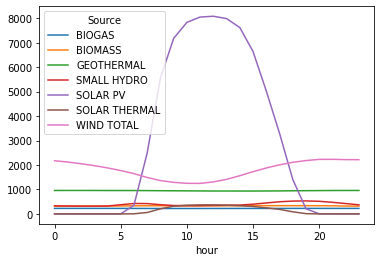

In [8]:
cds_piv.plot()

In [9]:
px.line(cds_piv)

In [10]:
cds_piv['total'] = cds_piv.sum(axis=1
                              )
cds_piv

Source      BIOGAS     BIOMASS  GEOTHERMAL  SMALL HYDRO     SOLAR PV  \
hour                                                                   
0       225.591781  318.301370  958.720548   330.824658     0.679452   
1       225.964384  318.369863  959.235616   322.421918     0.643836   
2       225.953425  319.846575  959.367123   318.249315     0.635616   
3       225.887671  320.567123  958.367123   316.909589     0.419178   
4       225.753425  321.742466  956.347945   322.254795     0.413699   
5       225.243836  323.863014  956.230137   375.180822     0.482192   
6       224.479452  330.808219  955.682192   426.931507   352.956164   
7       222.454795  333.178082  953.263014   422.564384  2489.268493   
8       221.536986  333.936986  949.024658   376.813699  5552.531507   
9       221.539726  332.273973  946.210959   343.756164  7174.468493   
10      221.408219  330.134247  943.405479   336.980822  7829.561644   
11      221.802740  329.369863  938.967123   338.473973  8047.476712   
12      222.731507  330.736986  936.627397   346.378082  8080.778082   
13      223.290411  332.043836  936.600000   353.904110  7985.413699   
14      223.465753  333.649315  935.613699   362.726027  7619.213699   
15      223.717808  335.821918  935.564384   397.095890  6639.180822   
16      224.342466  338.265753  937.736986   448.476712  5025.484932   
17      224.767123  337.016438  940.526027   497.013699  3299.101370   
18      225.473973  337.273973  946.139726   524.641096  1412.446575   
19      226.136986  337.273973  950.232877   531.112329   210.783562   
20      225.958904  334.961644  953.882192   515.457534     4.750685   
21      225.797260  331.964384  956.684932   474.386301     1.542466   
22      225.430137  321.104110  958.164384   423.049315     1.312329   
23      225.498630  318.375342  958.898630   372.060274     1.046575   

Source  SOLAR THERMAL   WIND TOTAL         total  
hour                                              
0            0.000000  2173.268493   4007.386301  
1            0.000000  2120.778082   3947.413699  
2            0.000000  2051.832877   3875.884932  
3            0.000000  1973.969863   3796.120548  
4            0.000000  1881.463014   3707.975342  
5            0.021918  1772.484932   3653.506849  
6            4.372603  1646.630137   3941.860274  
7           58.317808  1490.194521   5969.241096  
8          208.106849  1363.402740   9005.353425  
9          316.841096  1290.512329  10625.602740  
10         355.441096  1250.408219  11267.339726  
11         368.904110  1247.643836  11492.638356  
12         369.643836  1308.287671  11595.183562  
13         356.778082  1412.410959  11600.441096  
14         337.479452  1561.602740  11373.750685  
15         304.389041  1726.652055  10562.421918  
16         247.583562  1878.441096   9100.331507  
17         185.915068  2005.934247   7490.273973  
18          85.958904  2109.093151   5641.027397  
19          10.364384  2181.361644   4447.265753  
20           1.279452  2229.408219   4265.698630  
21           0.539726  2231.687671   4222.602740  
22           0.136986  2220.109589   4149.306849  
23           0.104110  2216.526027   4092.509589

In [11]:
px.line(cds_piv['total'])

In [12]:
cds['month'] = cds_date.month
cds

Source   MWh  hour  month
2017-08-29 00:00:00     GEOTHERMAL  1181     0      8
2017-08-29 00:00:00        BIOMASS   340     0      8
2017-08-29 00:00:00         BIOGAS   156     0      8
2017-08-29 00:00:00    SMALL HYDRO   324     0      8
2017-08-29 00:00:00     WIND TOTAL  1551     0      8
...                            ...   ...   ...    ...
2018-08-28 23:00:00         BIOGAS   235    23      8
2018-08-28 23:00:00    SMALL HYDRO   262    23      8
2018-08-28 23:00:00     WIND TOTAL  2921    23      8
2018-08-28 23:00:00       SOLAR PV     0    23      8
2018-08-28 23:00:00  SOLAR THERMAL     0    23      8

[61320 rows x 4 columns]

In [13]:
cds_piv = cds.pivot_table(
    values='MWh',
    index = 'month',
    columns = 'Source',
    aggfunc='max')
cds_piv

Source  BIOGAS  BIOMASS  GEOTHERMAL  SMALL HYDRO  SOLAR PV  SOLAR THERMAL  \
month                                                                       
1          249      376         999          585      8024            397   
2          248      374        1012          572      9369            441   
3          248      344        1012          564      9795            583   
4          248      336         967          681     10027            589   
5          253      359        1005          663     10050            604   
6          247      436        1009          659     10102            652   
7          240      482        1009          662      9997            636   
8          243      399        1212          652      9930            679   
9          178      421        1230          577      9044            667   
10         238      423        1009          583      8909            541   
11         242      380        1003          636      7550            443   
12         248      390         983          654      7178            431   

Source  WIND TOTAL  
month               
1             4015  
2             4420  
3             4108  
4             4531  
5             4925  
6             5006  
7             4466  
8             4675  
9             3943  
10            4426  
11            3567  
12            3978

In [14]:
px.line(cds_piv)

## Taking a Closer look at Last Tuesday's Demand for Electricity

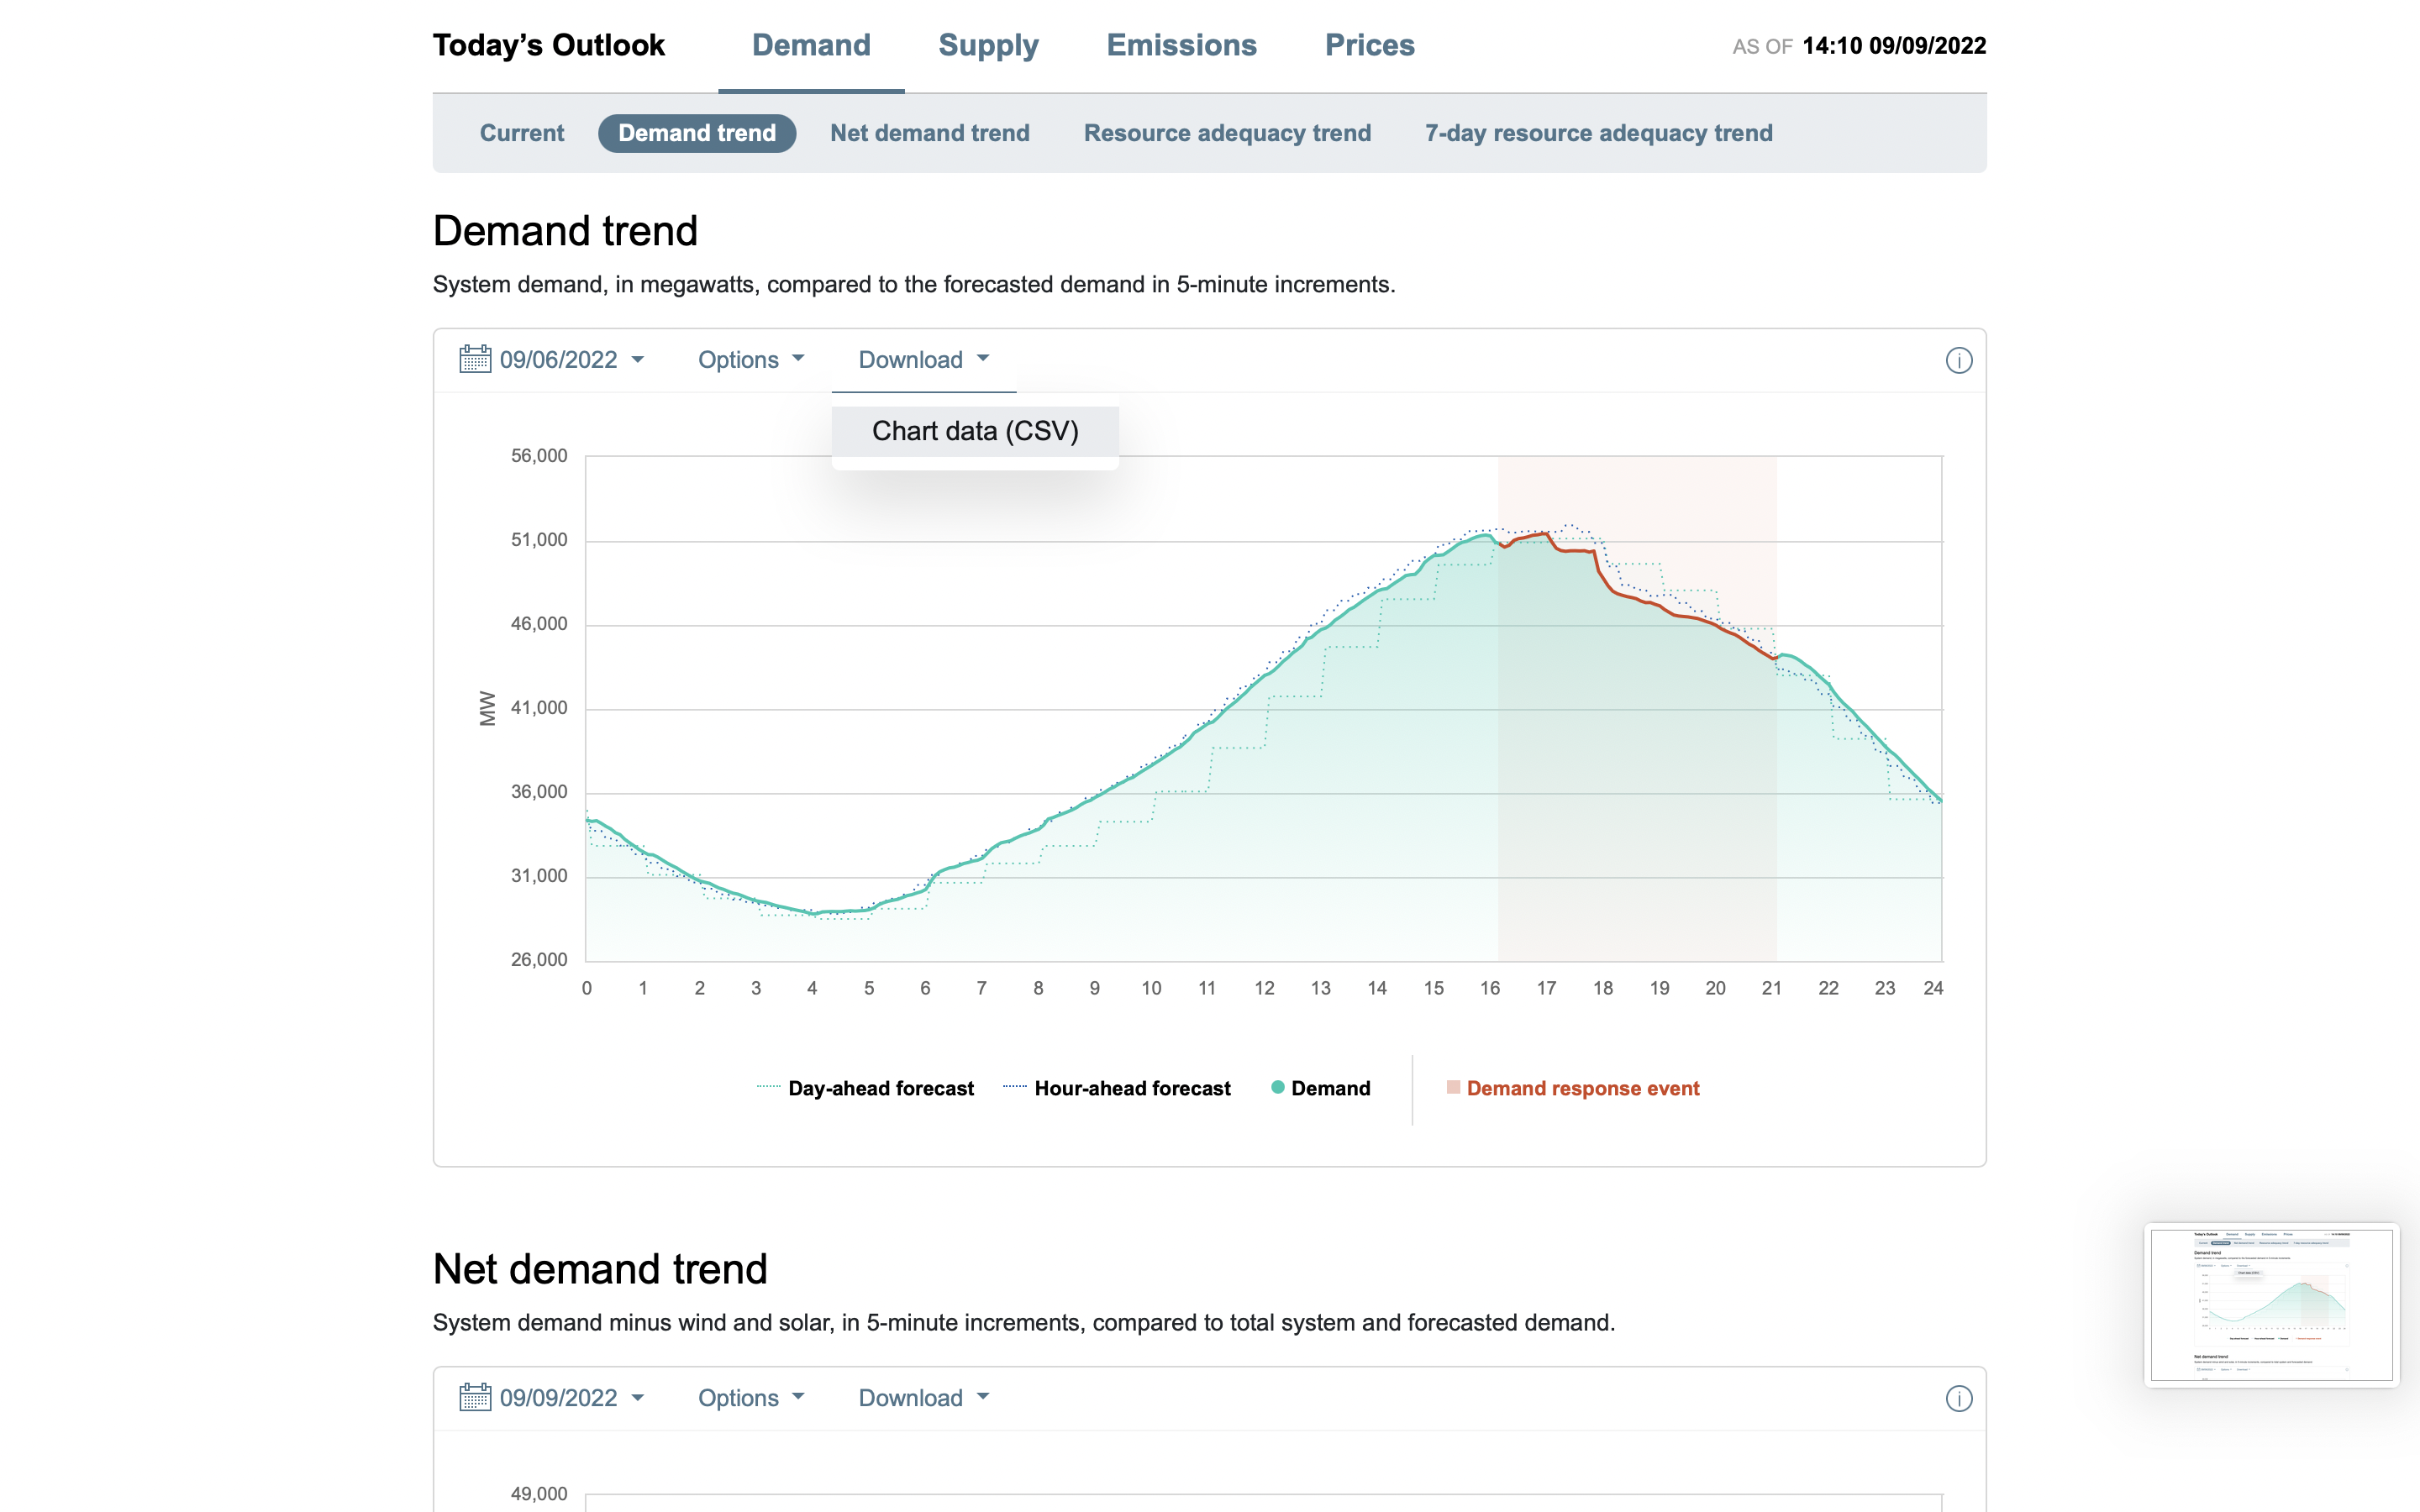

In [15]:
hot_tues = pd.read_csv('CAISO-demand-20220906.csv')
hot_tues

Demand 09/06/2022    00:00    00:05    00:10    00:15    00:20  \
0     Day-ahead forecast  34981.0  32851.0  32851.0  32851.0  32851.0   
1    Hour-ahead forecast  34342.0  33748.0  33748.0  33748.0  33284.0   
2                 Demand  34372.0  34308.0  34348.0  34190.0  34011.0   
3  Demand response event      NaN      NaN      NaN      NaN      NaN   

     00:25    00:30    00:35    00:40  ...    23:15    23:20    23:25  \
0  32851.0  32851.0  32851.0  32851.0  ...  35624.0  35624.0  35624.0   
1  33284.0  33284.0  32865.0  32865.0  ...  37610.0  36883.0  36883.0   
2  33865.0  33636.0  33518.0  33239.0  ...  37994.0  37677.0  37405.0   
3      NaN      NaN      NaN      NaN  ...      NaN      NaN      NaN   

     23:30    23:35    23:40    23:45    23:50    23:55  00:00.1  
0  35624.0  35624.0  35624.0  35624.0  35624.0  35624.0  35624.0  
1  36883.0  36104.0  36104.0  36104.0  35407.0  35407.0  35407.0  
2  37109.0  36849.0  36554.0  36251.0  36012.0  35751.0  35515.0  
3      NaN      NaN      NaN      NaN      NaN      NaN      NaN  

[4 rows x 290 columns]

In [16]:
ht = hot_tues.T.iloc[1:,:]
to_plot = ht.iloc[:, 0:3]
to_plot = to_plot.rename({0:'Day Ahead Forecast', 1: 'Hour Ahead Forecast', 2:'Demand'}, axis=1)
to_plot

Day Ahead Forecast Hour Ahead Forecast   Demand
00:00              34981.0             34342.0  34372.0
00:05              32851.0             33748.0  34308.0
00:10              32851.0             33748.0  34348.0
00:15              32851.0             33748.0  34190.0
00:20              32851.0             33284.0  34011.0
...                    ...                 ...      ...
23:40              35624.0             36104.0  36554.0
23:45              35624.0             36104.0  36251.0
23:50              35624.0             35407.0  36012.0
23:55              35624.0             35407.0  35751.0
00:00.1            35624.0             35407.0  35515.0

[289 rows x 3 columns]

In [17]:
px.line(to_plot, title='Electricity Demand Last Tuesday').update_layout(
    xaxis_title="Time", yaxis_title="MWh"
)